### **IMPORTING LIBRARIES**

In [ ]:
#IMPORTING LIBRARIES
import random
import torch
import cv2
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as Acivation
from sklearn.model_selection import train_test_split

#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob

#IMAGE PROCESS
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import seaborn as sns
import pandas as pd

#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

#Model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, Input, Activation
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet121
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)


device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
%matplotlib inline

### **DATA UPLOADING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/download/rust'
# zip_ref = zipfile.ZipFile(zip_path, 'r')
# file = zip_ref.extractall("./data1")
# zip_ref.close()

In [ ]:
CATEGORIES = ['rust', 'norust']

In [ ]:
folder_name = ['rust']
dataset_path = '/content/drive/MyDrive/download'


rust_data_path_1=[]
for category in folder_name:
        path=os.path.join(dataset_path, category)
        print(path)
        
        total = 0
        for img_file in os.listdir(path):
            # print(img_file)
            try:
                img=cv2.imread(os.path.join(path,img_file),1)
                       
                rust_data_path_1.append(os.path.join(path,img_file))
                total += 1
            except:
                print("Exception: ",img_file)
                pass
        print("total image in path "+path+ " :"+str(total))

print(len(rust_data_path_1))

/content/drive/MyDrive/download/rust
total image in path /content/drive/MyDrive/download/rust :238
238


In [ ]:
folder_name = ['norust']
dataset_path = '/content/drive/MyDrive/download'


norust_data_path_1=[]
for category in folder_name:
        path=os.path.join(dataset_path, category)
        print(path)
        
        total = 0
        for img_file in os.listdir(path):
            # print(img_file)
            try:
                img=cv2.imread(os.path.join(path,img_file),1)
                        
                norust_data_path_1.append(os.path.join(path,img_file))
                total += 1
            except:
                print("Exception: ",img_file)
                pass
        print("total image in path "+path+ " :"+str(total))

print(len(norust_data_path_1))

/content/drive/MyDrive/download/norust
total image in path /content/drive/MyDrive/download/norust :237
237


### **iMAGE lABELING** 

In [ ]:
# set rust image label
rust_data_path_label = list()
for i in range(len(rust_data_path_1)):
   rust_data_path_label.append('RUST')

print(rust_data_path_label[:1])
len(rust_data_path_label)

['RUST']


238

In [ ]:
# set norust image label
norust_data_path_label = list()
for i in range(len(norust_data_path_1)):
    norust_data_path_label.append('NO_RUST')

print(norust_data_path_label[:1])
len(norust_data_path_label)

['NO_RUST']


237

### **IMAGE AGGREGATION**

In [ ]:
# Aggregate all image(rust and norust) and thier label
all_data_path = list()
all_data_path.extend(rust_data_path_1) # rust
all_data_path.extend(norust_data_path_1) # norust


all_data_path_label = list()
all_data_path_label.extend(rust_data_path_label) # rust
all_data_path_label.extend(norust_data_path_label) # norust


print(len(all_data_path), len(all_data_path_label))

475 475


In [ ]:
# TRANSFORMATION TO SERIES STRUCTURE
Path_Series = pd.Series(all_data_path,name="IMG").astype(str)
Labels_Series = pd.Series(all_data_path_label,name="CATEGORY")

In [ ]:
# TRANSFORMATION TO DATAFRAME STRUCTURE
data_df = pd.concat([Path_Series,Labels_Series],axis=1)
print(data_df)

                                                   IMG CATEGORY
0    /content/drive/MyDrive/download/rust/Rust (58)...     RUST
1    /content/drive/MyDrive/download/rust/Rust (113...     RUST
2    /content/drive/MyDrive/download/rust/Rust (83)...     RUST
3    /content/drive/MyDrive/download/rust/Rust (42)...     RUST
4    /content/drive/MyDrive/download/rust/Rust (43)...     RUST
..                                                 ...      ...
470  /content/drive/MyDrive/download/norust/noRust ...  NO_RUST
471  /content/drive/MyDrive/download/norust/noRust ...  NO_RUST
472  /content/drive/MyDrive/download/norust/noRust ...  NO_RUST
473  /content/drive/MyDrive/download/norust/noRust ...  NO_RUST
474  /content/drive/MyDrive/download/norust/noRust ...  NO_RUST

[475 rows x 2 columns]


In [ ]:
#shuffle
data_df = data_df.sample(frac=1).reset_index(drop=True)
print(data_df)

                                                   IMG CATEGORY
0    /content/drive/MyDrive/download/rust/Rust (115...     RUST
1    /content/drive/MyDrive/download/norust/noRust ...  NO_RUST
2    /content/drive/MyDrive/download/norust/noRust ...  NO_RUST
3    /content/drive/MyDrive/download/norust/noRust ...  NO_RUST
4    /content/drive/MyDrive/download/rust/Rust (47)...     RUST
..                                                 ...      ...
470  /content/drive/MyDrive/download/rust/Rust (23)...     RUST
471  /content/drive/MyDrive/download/rust/Rust (43)...     RUST
472  /content/drive/MyDrive/download/norust/noRust ...  NO_RUST
473  /content/drive/MyDrive/download/rust/Rust (52)...     RUST
474  /content/drive/MyDrive/download/rust/Rust (171...     RUST

[475 rows x 2 columns]


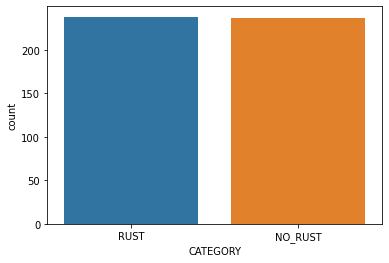

In [ ]:
sns.countplot(data_df["CATEGORY"])
plt.show()

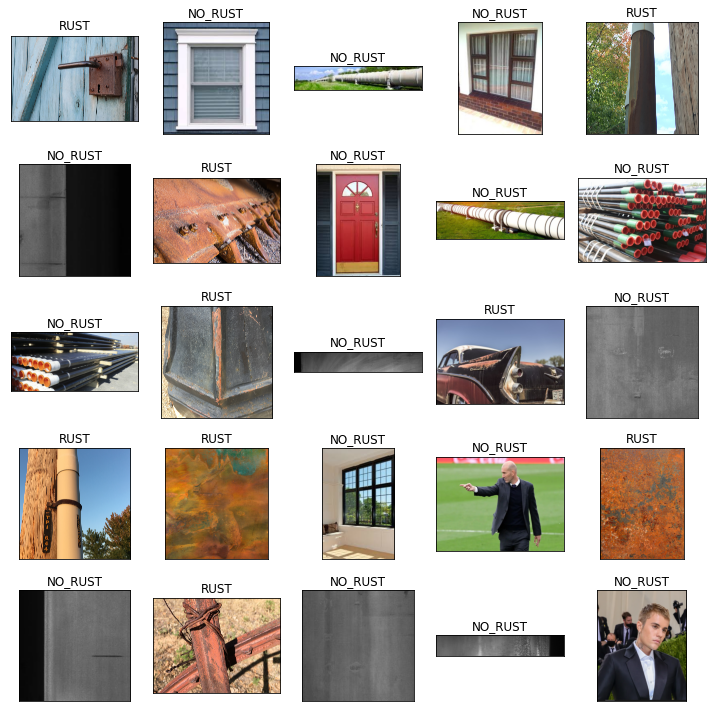

In [ ]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    img = cv2.imread(data_df["IMG"][i])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(data_df["CATEGORY"][i])
plt.tight_layout()
plt.show()

### **TEST/TRAIN SPLITING**

In [ ]:
Train_Data,Test_Data = train_test_split(data_df,train_size=0.9,random_state=42,shuffle=True)

In [ ]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (427, 2)
TEST SHAPE:  (48, 2)


In [ ]:
#Data Generator for training samples

Train_Generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    zoom_range=0.2,
                                    brightness_range=[0.2,0.9],
                                    rotation_range=30,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="IMG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   target_size=(224, 224),
                                                   subset="training")

#Data Generator for validation and testing samples

Validation_Generator = ImageDataGenerator(rescale=1./255)

Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="IMG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   subset="validation")

Test_Generator = ImageDataGenerator(rescale=1./255)

Test_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                   x_col="IMG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   target_size=(224, 224),
                                                   batch_size=100)

Found 385 validated image filenames belonging to 2 classes.
Found 42 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.


In [ ]:
encode = LabelEncoder()
test_encode_label = encode.fit_transform(Test_Data["CATEGORY"])

### **LABEL ENCODING & IMAGE AUGMENTATION**

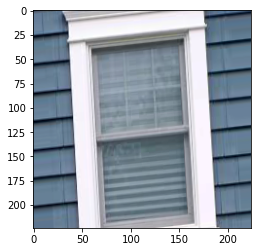

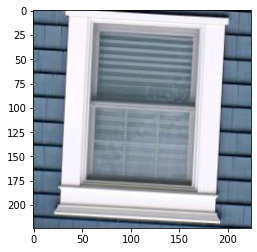

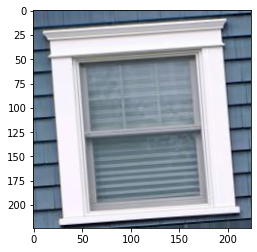

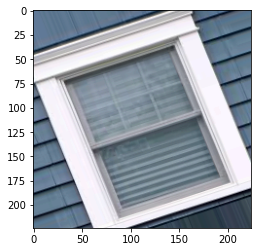

In [ ]:
# After Augmentation by datageneratior
example_Image = Train_Data["IMG"][1]
Load_Image = image.load_img(example_Image,target_size=(224,224))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.array_to_img(batch[0]))
   
    i += 1
    if i % 4 == 0:
        break
plt.show()

### **BASE CNN MODEL LAYERS**

In [ ]:
def build_model(cnn_model):
  

  model = Sequential()

  base_model = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[-1].output)
  
  model.add(base_model)

  #######################################################
  model.add(TimeDistributed(Flatten()))
  model.add(Bidirectional(LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)))
  model.add(Bidirectional(GRU(32, return_sequences=True,  dropout=0.5, recurrent_dropout=0.5)))
  #######################################################

  model.add(Flatten())
  model.add(Dense(256,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(2,activation="softmax"))
  
  
  return model

In [ ]:
def train_model(pretrained_model, freezing=True, num_epoch=1, optimizer_name ='adam'):

  # layer freezing
  if freezing == False:
    for layer in pretrained_model.layers:
        layer.trainable = True   # layer unfrozen
  else:
    for layer in pretrained_model.layers:
      layer.trainable = False   # layer frozen


  # create model
  model = build_model(cnn_model = pretrained_model)

  print(model.summary())

  # train the model
  model.compile(optimizer = optimizer_name , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
  
  callback_monitoring = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5, mode="min")  # early stopping
  
  model_history = model.fit(Train_IMG_Set,
                          validation_data=Validation_IMG_Set,
                          callbacks=callback_monitoring,
                          epochs=num_epoch)
  
  return model, model_history

### **EVALUATION METRICS**

In [ ]:
def plot_acc_loss_curve(model_hist):
  
  plt.plot(model_hist.history["accuracy"], label="acc")
  plt.plot(model_hist.history["val_accuracy"], label='val_acc')
  plt.ylabel("ACCURACY")
  plt.xlabel("EPOCH")
  plt.legend(loc='lower right')
  plt.ylim(0.5,1)
  plt.show()

  print('\n')

  plt.plot(model_hist.history["loss"], label='loss')
  plt.plot(model_hist.history["val_loss"], label='val_loss')
  plt.ylabel("LOSS")
  plt.xlabel("EPOCH")
  plt.legend(loc='lower right')
  plt.ylim(0,1)
  plt.show()

In [ ]:
def model_performance(model, data):

  test_batch, test_label = None, None
  for data_batch,label_batch in data:

      test_batch = data_batch
      test_label = label_batch
      print("DATA SHAPE: ",data_batch.shape)
      print("LABEL SHAPE: ",label_batch.shape)
      break

  predict = model.predict(test_batch)
  y_pred = predict.argmax(axis=-1)
  y_test = test_label.argmax(axis=-1)


  print("\n\n\n confusion_matrix")
  # Creates a confusion matrix
  cm = confusion_matrix(y_test, y_pred) 

  # Transform to df for easier plotting
  cm_df = pd.DataFrame(cm,
                      index = CATEGORIES, 
                      columns = CATEGORIES)

  plt.figure(figsize=(5.5,4))
  sns.heatmap(cm_df, annot=True)
  plt.title('Confusion Matrix \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  # plt.savefig('cm.png')
  plt.show()


  print("\n\n\n classification_report")
  print(classification_report(y_test, y_pred))

In [ ]:
# load model and print summary
from tensorflow.keras.applications import VGG16

vgg_base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg_base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

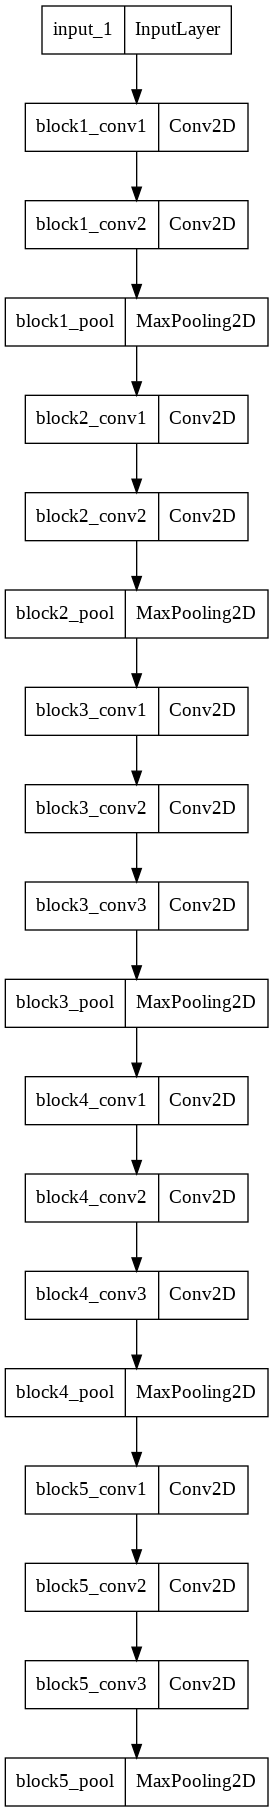

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(vgg_base_model, to_file='model.png')

### **VGG16 WITH ADAM OPTIMIZER**

In [ ]:
# load model and setting the optimizer
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

vgg_base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
opt = Adam(learning_rate=0.001, beta_1=0.91, beta_2=0.999, epsilon=1e-08, decay=0.0)

vgg_model, vgg_model_history_1 = train_model(pretrained_model=vgg_base_model, freezing=True, num_epoch=100, optimizer_name = opt)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 time_distributed (TimeDistr  (None, 7, 3584)          0         
 ibuted)                                                         
                                                                 
 bidirectional (Bidirectiona  (None, 7, 64)            925952    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 7, 64)            18816     
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 448)               0         
                                                        

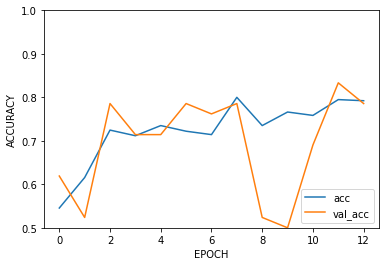

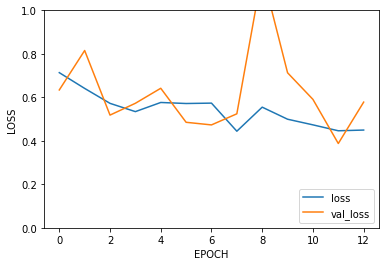

DATA SHAPE:  (48, 224, 224, 3)
LABEL SHAPE:  (48, 2)



 confusion_matrix


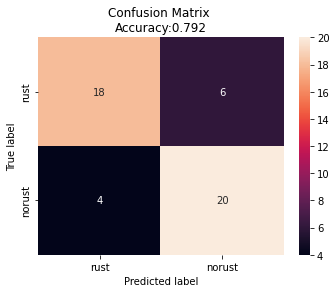




 classification_report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        24
           1       0.77      0.83      0.80        24

    accuracy                           0.79        48
   macro avg       0.79      0.79      0.79        48
weighted avg       0.79      0.79      0.79        48



In [ ]:
plot_acc_loss_curve(model_hist = vgg_model_history_1)
model_performance(model = vgg_model, data = Test_IMG_Set)

In [ ]:
vgg_model.save('/content/drive/MyDrive/corrosionmodels/vgg_model.h5')

# **XCEPTION**

In [ ]:
# load model and print summary
from keras.applications.xception import Xception, preprocess_input

xception_base_model = Xception(include_top=False, input_shape=(299, 299, 3))
xception_base_model.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [ ]:
# load model and setting the optimizer
from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.optimizers import Adam

xception_base_model = Xception(include_top=False, input_shape=(224, 224, 3))
opt = Adam(learning_rate=0.001, beta_1=0.91, beta_2=0.999, epsilon=1e-08, decay=0.0)

xception_model, xception_model_history_1 = train_model(pretrained_model=xception_base_model, freezing=True, num_epoch=100, optimizer_name = opt)

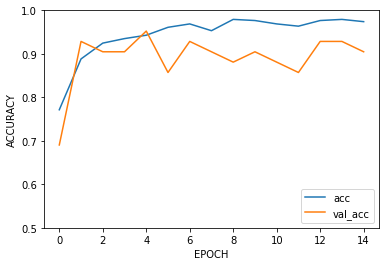

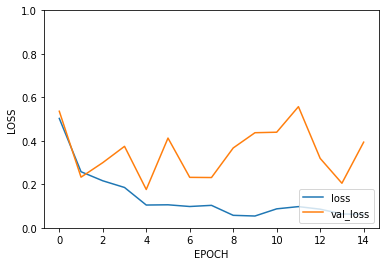

DATA SHAPE:  (48, 224, 224, 3)
LABEL SHAPE:  (48, 2)



 confusion_matrix


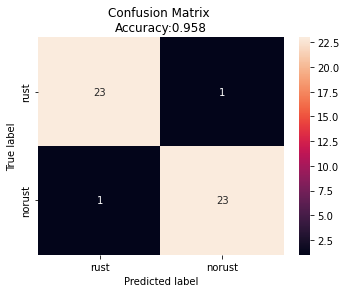




 classification_report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.96      0.96      0.96        24

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



In [ ]:
plot_acc_loss_curve(model_hist = xception_model_history_1)
model_performance(model = xception_model, data = Test_IMG_Set)

In [ ]:
xception_model.save('/content/drive/MyDrive/corrosionmodels/xception_model.h5')

# **## CUSTOM CNN MODEL**

In [ ]:
from tensorflow.keras.models import Sequential, Model

In [ ]:
def build_model(cnn_model):
  

  model = Sequential()

  base_model = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[-1].output)
  
  model.add(base_model)

  #######################################################
  model.add(TimeDistributed(Flatten()))
  model.add(Bidirectional(LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)))
  model.add(Bidirectional(GRU(32, return_sequences=True,  dropout=0.5, recurrent_dropout=0.5)))
  #######################################################

  model.add(Flatten())
  model.add(Dense(256,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(2,activation="softmax"))
  
  
  return model

In [ ]:
def make_cnn_model(input_shape =( 224, 224, 3), num_cnn = 2, s_kernal = 32, ks = 3, cnn_s = 1, ps = 2, pool_s = 2, act = 'relu'):

  n_kernal = s_kernal

  # create CNN model
  model = Sequential()

  model.add(Conv2D(n_kernal, kernel_size=(ks, ks), strides=(cnn_s, cnn_s), activation=act, input_shape= input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(ps, ps), strides=(pool_s, pool_s)))

  for i in range(num_cnn -1):
    try:
      n_kernal = n_kernal + n_kernal
      model.add(Conv2D(n_kernal, kernel_size=(ks, ks), strides=(cnn_s, cnn_s), activation=act, input_shape= input_shape ))
      model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size=(ps, ps), strides=(pool_s, pool_s)))

    except:
        print("Error: Check relation betwenn input and number of CNN layer \n\n\n")
        pass

  return model

In [ ]:
def train_custom_model(custom_cnn, num_epoch=1, optimizer_name ='adam'):

  # create model
  model = build_model(cnn_model = custom_cnn)

  print(model.summary())


  # train the model
  model.compile(optimizer = optimizer_name , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
  
  callback_monitoring = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")
  
  model_history = model.fit(Train_IMG_Set,
                          validation_data=Validation_IMG_Set,
                          callbacks=callback_monitoring,
                          epochs=num_epoch)
  
  return model, model_history

In [ ]:
# load custom  cnn model 2
cnn_model_2 = make_cnn_model(input_shape =(224, 224, 3), 
                             num_cnn = 5, 
                             s_kernal = 32, 
                             ks = 3, 
                             cnn_s = 1, 
                             ps = 2, 
                             pool_s = 2, 
                             act = 'relu')
cnn_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_9 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001, beta_1=0.91, beta_2=0.999, epsilon=1e-08, decay=0.0)

cnn_model_2, cnn_model_history_2 = train_custom_model(custom_cnn=cnn_model_2, num_epoch=100, optimizer_name = opt)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 5, 5, 512)         1572544   
                                                                 
 time_distributed_2 (TimeDis  (None, 5, 2560)          0         
 tributed)                                                       
                                                                 
 bidirectional_4 (Bidirectio  (None, 5, 64)            663808    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 5, 64)            18816     
 nal)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 320)               0         
                                                      

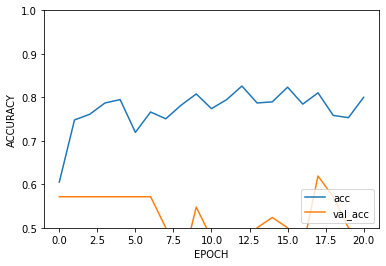

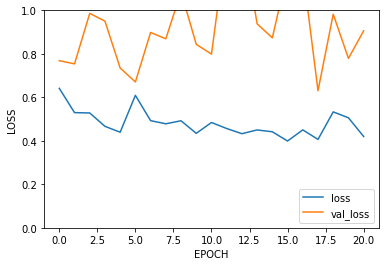

DATA SHAPE:  (48, 224, 224, 3)
LABEL SHAPE:  (48, 2)



 confusion_matrix


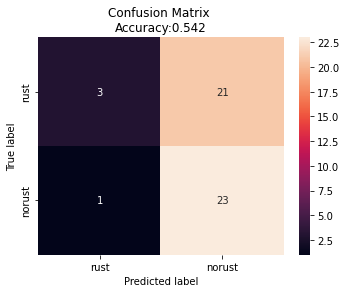




 classification_report
              precision    recall  f1-score   support

           0       0.75      0.12      0.21        24
           1       0.52      0.96      0.68        24

    accuracy                           0.54        48
   macro avg       0.64      0.54      0.45        48
weighted avg       0.64      0.54      0.45        48



In [ ]:
plot_acc_loss_curve(model_hist = cnn_model_history_2)
model_performance(model = cnn_model_2, data = Test_IMG_Set)

In [ ]:
cnn_model_2.save('/content/drive/MyDrive/corrosionmodels/CUSTOMCNN_model.h5')

### **DENSENET121**

In [ ]:
# load model and print summary
from tensorflow.keras.applications import DenseNet121

dense_base_model = DenseNet121(include_top=False, input_shape=(224, 224, 3))
dense_base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_7[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                       

In [ ]:
# load model and setting the optimizer
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam

dense_base_model = DenseNet121(include_top=False, input_shape=(224, 224, 3))
opt = Adam(learning_rate=0.001, beta_1=0.91, beta_2=0.999, epsilon=1e-08, decay=0.0)

dense_model, dense_model_history_1 = train_model(pretrained_model=dense_base_model, freezing=True, num_epoch=100, optimizer_name = opt)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_4 (Functional)        (None, 7, 7, 1024)        7037504   
                                                                 
 time_distributed_4 (TimeDis  (None, 7, 7168)          0         
 tributed)                                                       
                                                                 
 bidirectional_8 (Bidirectio  (None, 7, 64)            1843456   
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 7, 64)            18816     
 nal)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 448)               0         
                                                      

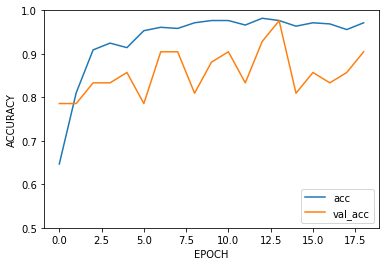

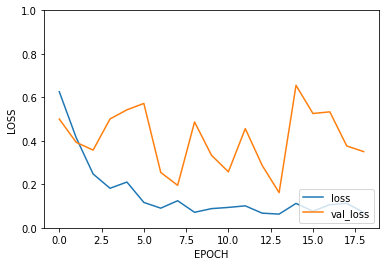

DATA SHAPE:  (48, 224, 224, 3)
LABEL SHAPE:  (48, 2)





 confusion_matrix


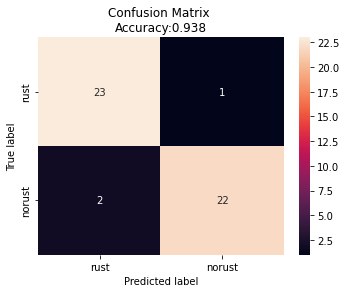




 classification_report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.96      0.92      0.94        24

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48



In [ ]:
plot_acc_loss_curve(model_hist = dense_model_history_1)
model_performance(model = dense_model, data = Test_IMG_Set)

In [ ]:
dense_model.save('/content/drive/MyDrive/corrosionmodels/densenet_model.h5')

In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


In [ ]:
# load model
model = dense_model

# image path
# img_path = '/content/sample_data/norust (1).jpg'    # no
img_path = '/content/sample_data/Rust (53).jpg'      # rust

# load a single image
new_image = load_image(img_path)

# check prediction
pred = model.predict(new_image)
print(pred)

FileNotFoundError: ignored